In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
sns.set_theme(style = "darkgrid")


init_notebook_mode(connected=True)
%matplotlib inline

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [27]:
pip install category_encoders

  Obtaining dependency information for category_encoders from https://files.pythonhosted.org/packages/7f/e5/79a62e5c9c9ddbfa9ff5222240d408c1eeea4e38741a0dc8343edc7ef1ec/category_encoders-2.6.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 217.9 kB/s eta 0:00:01
   -------------------- ------------------- 41.0/81.9 kB 217.9 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 352.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("D:\BIA_Python\BIA-main\Training Data.csv")

In [5]:
df.shape

(252000, 13)

In [4]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [7]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [10]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


<Axes: >

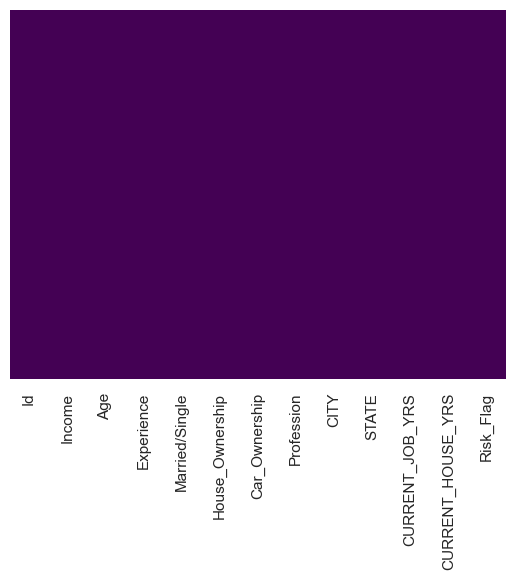

In [8]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

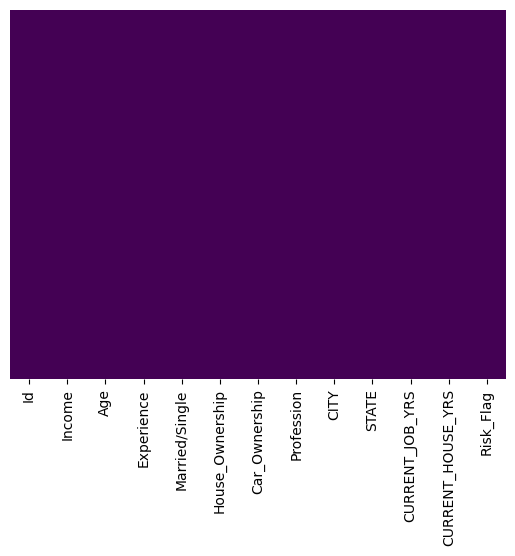

In [4]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [7]:
X.isnull()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,False,False,False,False,False,False,False,False,False,False,False,False
251996,False,False,False,False,False,False,False,False,False,False,False,False
251997,False,False,False,False,False,False,False,False,False,False,False,False
251998,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
y.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
251995    False
251996    False
251997    False
251998    False
251999    False
Name: Risk_Flag, Length: 252000, dtype: bool

In [20]:
rows, columns = df.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 252000
Columns: 13


In [9]:
sns.pairplot(df)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



Error in callback <function flush_figures at 0x0000023B460419E0> (for post_execute):


KeyboardInterrupt: 

In [21]:
df.head()  ##hyper parameter tuning is important

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


C:\Users\dell\AppData\Local\Temp\ipykernel_5944\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='Risk_Flag', ylabel='Density'>

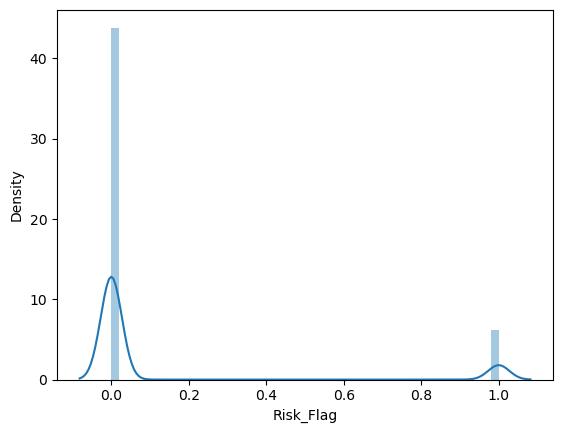

In [12]:
sns.distplot(y)

In [4]:
df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
91277,91278,5379845,31,5,married,rented,no,Police_officer,Narasaraopet,Andhra_Pradesh,5,12,0
249242,249243,2201976,53,8,single,rented,yes,Surgeon,Farrukhabad,Uttar_Pradesh,8,10,1
214143,214144,9055988,27,6,single,rented,no,Artist,Pallavaram,Tamil_Nadu,3,10,1
195357,195358,1577761,22,16,married,rented,no,Industrial_Engineer,Bhilai,Chhattisgarh,7,12,0
115069,115070,8355348,63,9,single,rented,yes,Drafter,Etawah,Uttar_Pradesh,5,14,0


In [5]:
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [7]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [8]:
print(df.duplicated().sum()) 

0


In [9]:
df.drop_duplicates(inplace=True) 

In [10]:
print(df.duplicated().sum())  

0


In [11]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

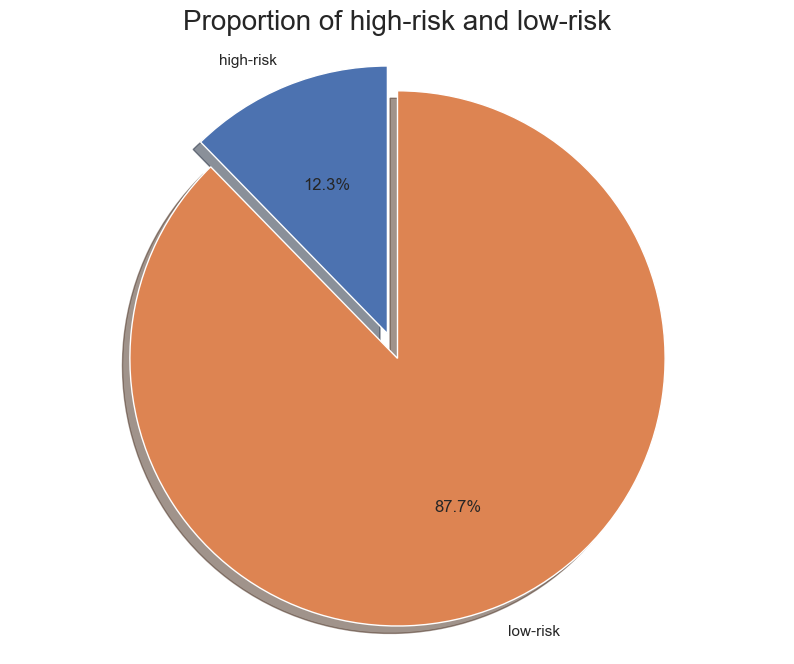

In [11]:
labels = 'high-risk', 'low-risk'
sizes = [df.Risk_Flag[df['Risk_Flag']==1].count(), df.Risk_Flag[df['Risk_Flag']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of high-risk and low-risk", size = 20)
plt.show()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64


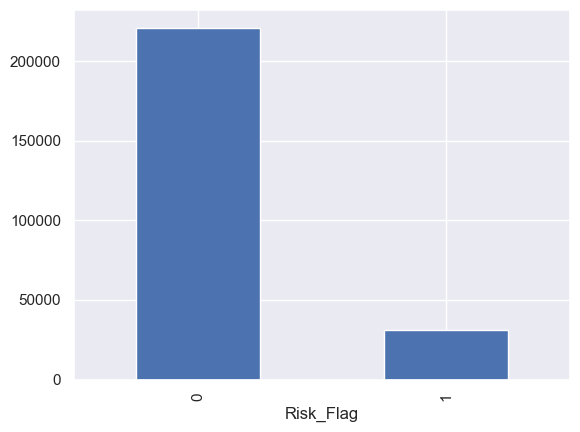

In [49]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Risk_Flag"].map(lambda x: color_wheel.get(x + 1))
print(df.Risk_Flag.value_counts())
p=df.Risk_Flag.value_counts().plot(kind="bar")

<Axes: xlabel='Car_Ownership', ylabel='count'>

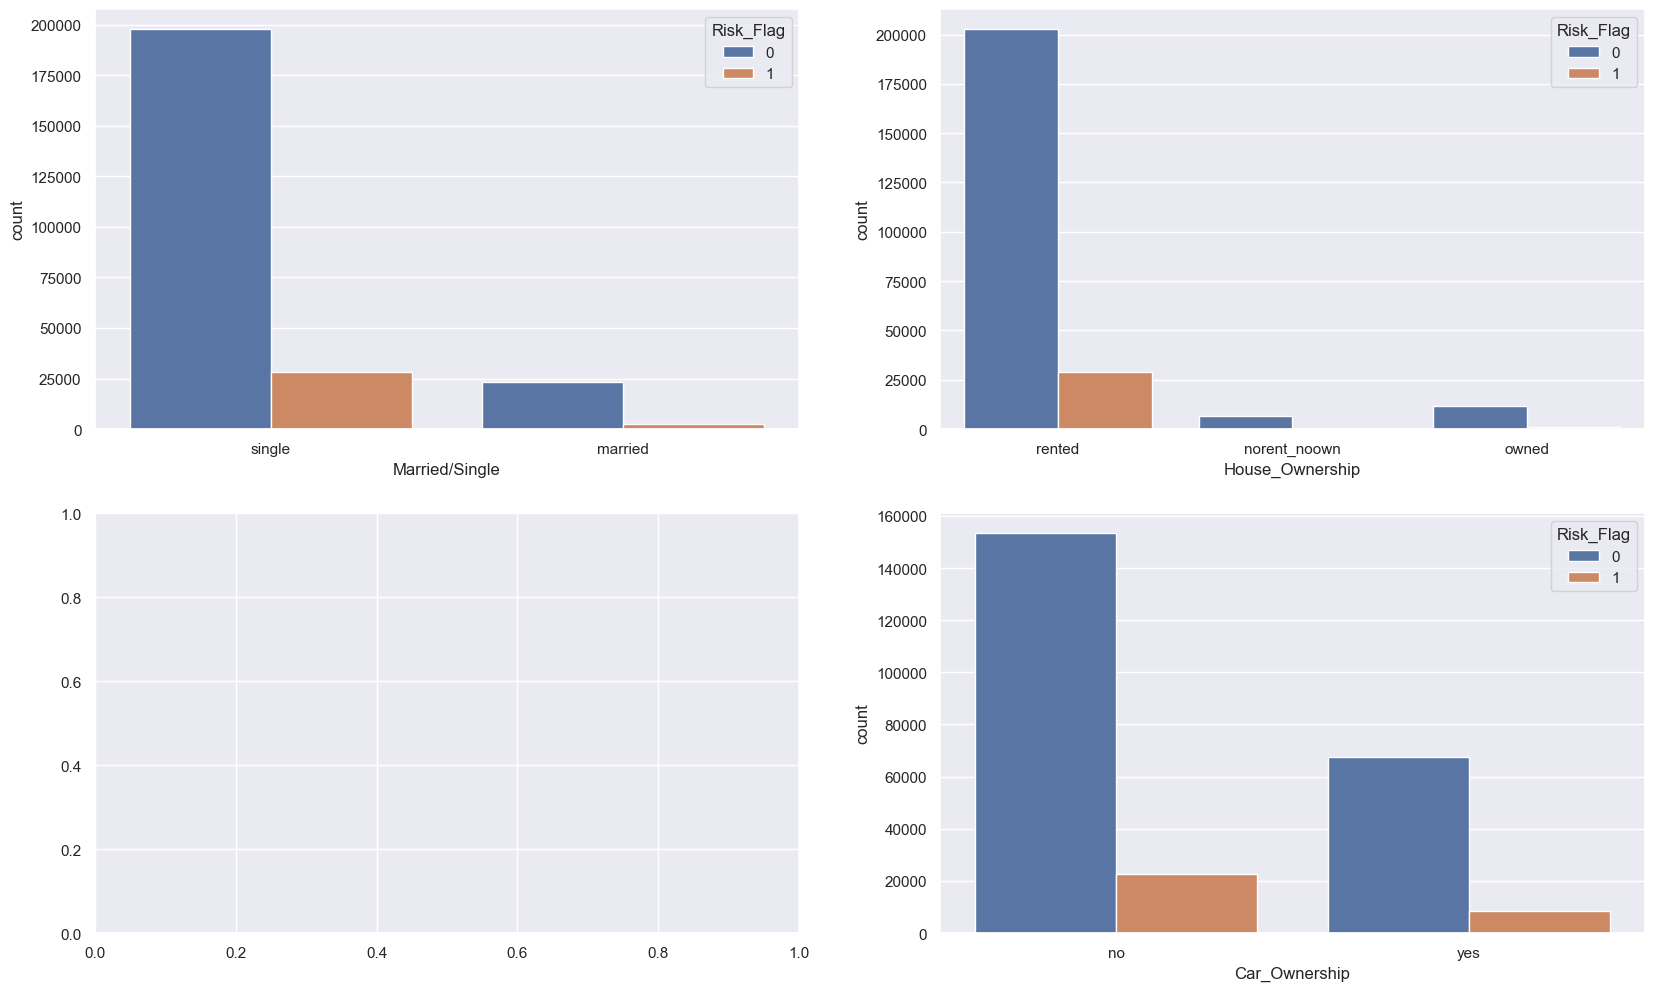

In [13]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Married/Single', hue = 'Risk_Flag',data = df, ax=axarr[0][0])
sns.countplot(x='House_Ownership', hue = 'Risk_Flag',data = df, ax=axarr[0][1])
sns.countplot(x='Car_Ownership', hue = 'Risk_Flag',data = df, ax=axarr[1][1])

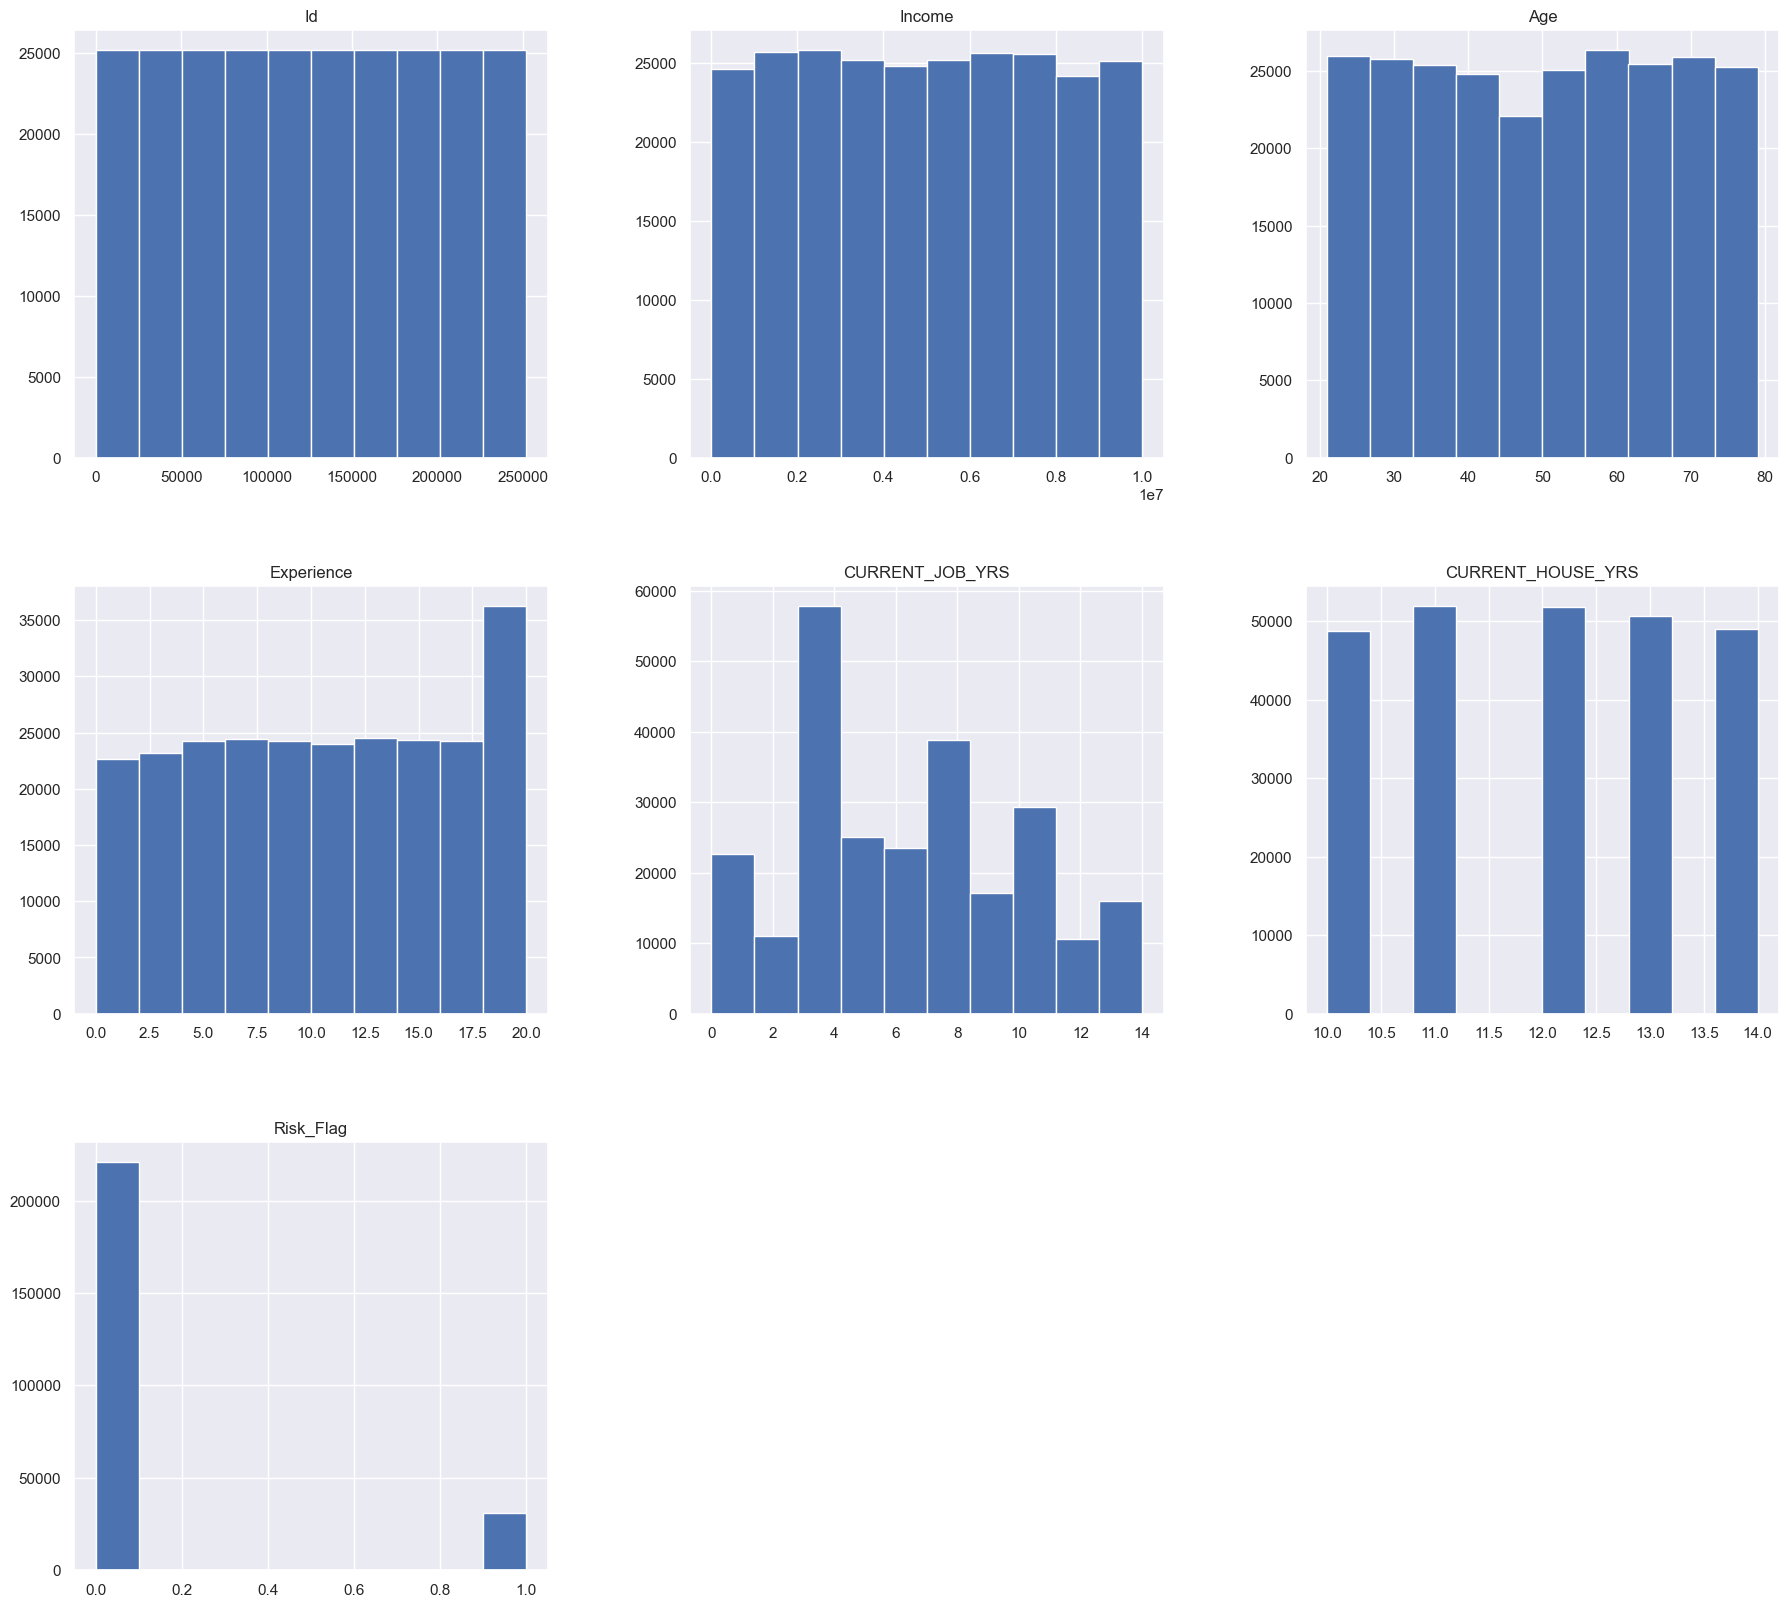

In [12]:
df.hist( figsize = (22, 20) )
plt.show()

In [16]:
df["Risk_Flag"].value_counts()

Risk_Flag
0    221004
1     30996
Name: count, dtype: int64

In [17]:
df['Married/Single'].unique()

array(['single', 'married'], dtype=object)

In [18]:
# convert Married/Single column to numeric
df['Married/Single'] = df['Married/Single'].map({'single': 0, 'married': 1})

In [19]:
df['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [20]:
# convert Married/Single column to numeric
df['House_Ownership'] = df['House_Ownership'].map({'norent_noown': 0, 'rented': 1, 'owned': 2})

In [21]:
df['Car_Ownership'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
# convert Married/Single column to numeric
df['Car_Ownership'] = df['Car_Ownership'].map({'no': 0, 'yes': 1})

In [23]:
df['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [24]:
df['CITY'].unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [22]:
df['STATE'].unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

In [25]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,0,1,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,0,1,0,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,1,1,0,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,0,1,1,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,0,1,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [34]:
df = df.drop(["CITY", "STATE","CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS"],axis=1)

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

import pickle 

In [30]:
import category_encoders as ce

high_card_features = ['Profession']
count_encoder = ce.CountEncoder()

In [31]:
# Transform the features, rename the columns with the _count suffix, and join to dataframe
count_encoded = count_encoder.fit_transform( df[high_card_features] )
df = df.join(count_encoded.add_suffix("_count"))
df= df.drop(labels=['Profession'], axis=1)

In [32]:
df = df.drop(['Id'], axis=1)

In [35]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Risk_Flag,Profession_count
0,1303834,23,3,0,1,0,0,5217
1,7574516,40,10,0,1,0,0,5053
2,3991815,66,4,1,1,0,0,5195
3,6256451,41,2,0,1,1,1,5053
4,5768871,47,11,0,1,0,1,4413


In [36]:
df.corr()['Risk_Flag']

Income             -0.003091
Age                -0.021809
Experience         -0.034523
Married/Single     -0.021092
House_Ownership    -0.011171
Car_Ownership      -0.024036
Risk_Flag           1.000000
Profession_count   -0.008587
Name: Risk_Flag, dtype: float64

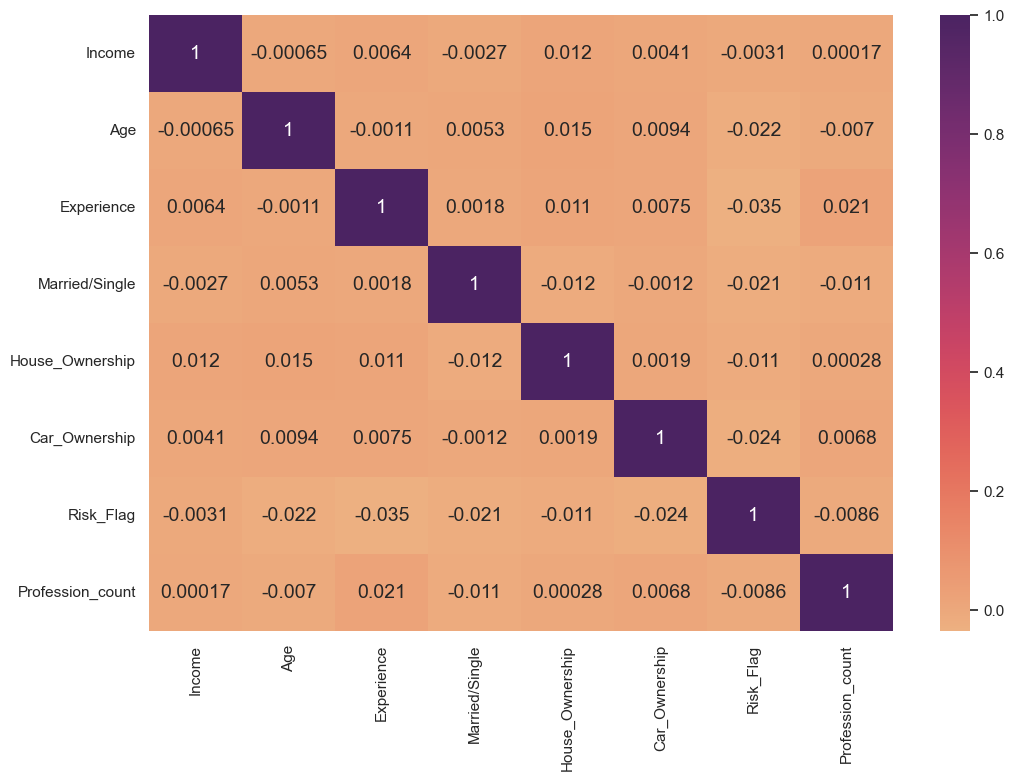

In [37]:
fig, ax = plt.subplots( figsize = (12,8) )
corr_matrix = df.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})
plt.show()

In [41]:
x = df.drop("Risk_Flag", axis=1)
y = df["Risk_Flag"]

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=7)

In [42]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [44]:
y_pred = logmodel.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 87.65277777777779 %


In [47]:
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44177
           1       0.00      0.00      0.00      6223

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 89.96230158730158 %


In [48]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     44177
           1       0.60      0.54      0.57      6223

    accuracy                           0.90     50400
   macro avg       0.77      0.75      0.76     50400
weighted avg       0.90      0.90      0.90     50400



In [33]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='gini', bootstrap=True, max_depth=10, max_features=None, min_samples_split=2, n_estimators=100, random_state=100)

# With Scaling 
clf.fit(X_train_scale,y_train) 
y_pred = clf.predict(X_test_scale)
print("With Scaling: ",accuracy_score(y_test,y_pred))

print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { recall_score(y_test, y_pred) }")
print(f"Precision: { precision_score(y_test, y_pred) }")
print(f"F1-Score: { f1_score(y_test, y_pred) }")
print(f"Accuracy score: { accuracy_score(y_test, y_pred) }")
print(f"AUC Score: { roc_auc_score(y_test, y_pred) }")

With Scaling:  0.8803571428571428
-------------------------TEST SCORES-----------------------
Recall: 0.042103565091143734
Precision: 0.7393767705382436
F1-Score: 0.07967032967032966
Accuracy score: 0.8803571428571428
AUC Score: 0.5200110821089301
